In [ ]:
!pip install pennylane torch torchvision torchaudio transformers pillow tqdm numpy qiskit qiskit-aer qiskit-machine-learning scikit-learn matplotlib opencv-python pennylane-lightning[gpu]
# ---- 1. Downgrade JAX to a PennyLane-compatible version ----
#!pip install -q "jax>=0.6.0,<0.6.3" "jaxlib>=0.6.0,<0.6.3" --force-reinstall
#
#!pip install cuquantum
#!pip install -q pennylane pennylane-lightning[gpu] cuquantum-python --extra-index-url=https://pypi.nvidia.com --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Change directory to the desired location where the file is stored.
%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
# prompt: I want to download devanagari character dataset from Kaggle.

#!pip install kaggle
#!mkdir -p ~/.kaggle
#!cp /content/drive/MyDrive/brahmi/kaggle.json ~/.kaggle/kaggle.json
#!kaggle datasets download --force -d gautamneha/brahmi-dataset
!unzip "/content/drive/My Drive/brahmi-dataset.zip" -d "/content/data"

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/test/117/26.jpg  
  inflating: /content/data/test/117/27.jpg  
  inflating: /content/data/test/117/28.jpg  
  inflating: /content/data/test/117/29.jpg  
  inflating: /content/data/test/117/30.jpg  
  inflating: /content/data/test/118/26.jpg  
  inflating: /content/data/test/118/27.jpg  
  inflating: /content/data/test/118/28.jpg  
  inflating: /content/data/test/118/29.jpg  
  inflating: /content/data/test/118/30.jpg  
  inflating: /content/data/test/119/26.jpg  
  inflating: /content/data/test/119/27.jpg  
  inflating: /content/data/test/119/28.jpg  
  inflating: /content/data/test/119/29.jpg  
  inflating: /content/data/test/119/30.jpg  
  inflating: /content/data/test/12/1.jpg  
  inflating: /content/data/test/12/11.jpg  
  inflating: /content/data/test/12/15.jpg  
  inflating: /content/data/test/12/18.jpg  
  inflating: /content/data/test/12/22.jpg  
  inflating: /content/data/test/120/26.jpg  
  inflatin

In [ ]:
import math, random, os, numpy as np, torch
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader, Subset
import pennylane as qml

#from transformers import T5TokenizerFast, T5ForConditionalGeneration, Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq

SEED = 42
random.seed(SEED); torch.manual_seed(SEED)
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

Device: cpu


/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset, Subset

from torchvision import transforms
from skimage.morphology import skeletonize
from sklearn.preprocessing import binarize

from skimage import exposure
from skimage import io, transform
from skimage.transform import resize


def seam_carving(image, output_shape):
    """Apply seam carving to resize the image to the specified output shape."""
    image_np = image.numpy().squeeze()  # Convert to numpy and remove the channel dimension
    carved_image = resize(image_np, output_shape, anti_aliasing=True, mode='reflect')
    return torch.tensor(carved_image).unsqueeze(0)  # Convert back to tensor and add channel dimension


def binarize_image(image, threshold):
    return (image > threshold).float()

# Custom function to skeletonize the image
def skeletonize_image(image):
    image_np = image.numpy()  # Convert to NumPy array and remove channel dimension
    skeleton = skeletonize(image_np)  # Skeletonize the image
    return torch.tensor(skeleton).unsqueeze(0)  # Convert back to tensor and add channel dimension

# Custom function to flatten and normalize the image
def flatten_and_normalize(img):
    img = img.view(-1)  # Flatten the image
    #img = img[:127]  # Use only the first 127 pixels
    #norm = img.norm(p=1)  # Calculate the L2 norm
    #img = img / norm  # Normalize the image
    return img

# Custom function for histogram normalization
def histogram_normalize(img):
    img_np = img.squeeze().numpy()  # Convert to NumPy array and remove channel dimension
    img_eq = exposure.equalize_hist(img_np)  # Apply histogram normalization
    return torch.tensor(img_eq).unsqueeze(0)  # Convert back to tensor and add channel dimension


image_size= 32
# Define the transform to resize, inspect size, flatten, and normalize the images
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((image_size, image_size)),  # Resize all images to 28x28 pixels
    transforms.ToTensor(),  # Convert to tensor
    transforms.Lambda(lambda x: seam_carving(x, (image_size, image_size))),  # Resize using seam carving
#    transforms.Lambda(lambda x: binarize_image(x, threshold=0.5)),  # Binarize the image
#    transforms.Lambda(skeletonize_image),  # Skeletonize the image
#    transforms.Lambda(lambda x: print(f"Image shape before flattening: {x.shape}") or x),  # Inspect size
#    transforms.Lambda(flatten_and_normalize)  # Flatten and normalize
])

# Load the datasets with the defined transformation
train_dataset_all = datasets.ImageFolder(root='/content/data/train', transform=transform)
test_dataset_all = datasets.ImageFolder(root='/content/data/test', transform=transform)

batch_size=10

# take first 100 and 30 samples
train_subset = Subset(train_dataset_all, range(1000))
test_subset  = Subset(test_dataset_all, range(300))

# Create DataLoaders
train_loader = DataLoader(train_dataset_all, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset_all, batch_size=batch_size, shuffle=False)

In [ ]:
# Try to infer number of classes automatically from your loader
try:
    # Works for ImageFolder or similar datasets
    N_CLASSES = len(train_loader.dataset.classes)
except AttributeError:
    # If dataset has targets or labels attribute
    if hasattr(train_loader.dataset, "targets"):
        N_CLASSES = len(set(train_loader.dataset.targets))
    elif hasattr(train_loader.dataset, "labels"):
        N_CLASSES = len(set(train_loader.dataset.labels))
    else:
        # As a fallback, infer from one batch
        sample_batch = next(iter(train_loader))
        _, sample_labels = sample_batch
        N_CLASSES = int(torch.max(sample_labels).item() + 1)
print(f"Detected {N_CLASSES} classes automatically.")


Detected 170 classes automatically.


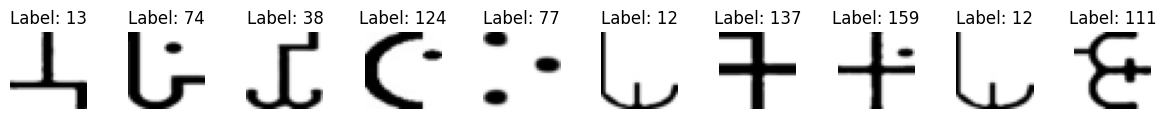

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load a batch of images from the train_loader
dataiter = iter(train_loader)
images, labels = next(dataiter)  # Use the built-in next() function

# Reshape the flattened images back to 28x28
images = images.view(-1, image_size, image_size)

# Plot a few images from the batch
fig, axes = plt.subplots(1, 10, figsize=(15,1))
for i in range(10):
    img = images[i] / 2 + 0.5  # Unnormalize if the images were normalized
    ax = axes[i]
    ax.imshow(img.numpy(), cmap='gray')  # Plot in grayscale
    ax.set_title(f'Label: {labels[i]}')
    ax.axis('off')

plt.show()


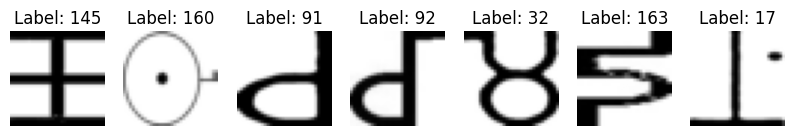

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load a batch of images from the train_loader
dataiter = iter(train_loader)
images, labels = next(dataiter)  # Use the built-in next() function

# Reshape the flattened images back to 28x28
images = images.view(-1, image_size, image_size)

# Plot a few images from the batch
fig, axes = plt.subplots(1, 7, figsize=(10, 6))
for i in range(7):
    img = images[i] / 2 + 0.5  # Unnormalize if the images were normalized
    ax = axes[i]
    ax.imshow(img.numpy(), cmap='gray')  # Plot in grayscale
    ax.set_title(f'Label: {labels[i]}')
    ax.axis('off')

plt.show()


In [ ]:
# ============================================================
# BATCHED QDRM DATASET GENERATION (FASTEST PRACTICAL VERSION)
# ============================================================

import os
import cv2
import numpy as np
import pandas as pd
import torch
from tqdm import tqdm

# ============================================================
# GOOGLE DRIVE ROOT
# ============================================================

DRIVE_ROOT = "/content/drive/MyDrive"
OUT_ROOT = os.path.join(DRIVE_ROOT, "qdrm_dataset")

CLEAN_DIR    = os.path.join(OUT_ROOT, "clean")
DEGRADED_DIR = os.path.join(OUT_ROOT, "degraded")

os.makedirs(CLEAN_DIR, exist_ok=True)
os.makedirs(DEGRADED_DIR, exist_ok=True)

print("[INFO] Saving dataset to:", OUT_ROOT)

# ============================================================
# FAST TENSOR → IMAGE (BATCHED)
# ============================================================

def batch_tensor_to_images(batch: torch.Tensor) -> np.ndarray:
    """
    batch: (B,H,W) or (B,1,H,W) or (B,3,H,W)
    returns: (B,H,W) uint8
    """
    batch = batch.detach().cpu()

    if batch.ndim == 4:
        if batch.shape[1] == 1:
            batch = batch[:, 0]              # (B,H,W)
        elif batch.shape[1] == 3:
            batch = batch.mean(dim=1)        # grayscale
        else:
            raise ValueError("Unexpected channel count")

    batch = batch.numpy()

    if batch.max() <= 1.0:
        batch = batch * 255.0

    return batch.clip(0, 255).astype(np.uint8)


# ============================================================
# PRECOMPUTED KERNELS
# ============================================================

MOTION_KERNEL = np.zeros((7, 7), np.float32)
MOTION_KERNEL[3, :] = 1.0 / 7

ERODE_KERNEL = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))


# ============================================================
# BATCHED DEGRADATION
# ============================================================

def degrade_batch(images: np.ndarray) -> np.ndarray:
    """
    images: (B,H,W) uint8
    returns: (B,H,W) uint8
    """
    out = images.copy()

    B = out.shape[0]

    # Motion blur
    for i in range(B):
        if np.random.rand() < 0.8:
            out[i] = cv2.filter2D(out[i], -1, MOTION_KERNEL)

    # Noise
    noise_mask = np.random.rand(B) < 0.8
    noise = np.random.normal(0, 18, out.shape).astype(np.float32)
    out[noise_mask] = np.clip(
        out[noise_mask].astype(np.float32) + noise[noise_mask],
        0, 255
    ).astype(np.uint8)

    # Erosion
    for i in range(B):
        if np.random.rand() < 0.6:
            out[i] = cv2.erode(out[i], ERODE_KERNEL, iterations=1)

    # Low contrast
    for i in range(B):
        if np.random.rand() < 0.7:
            alpha = np.random.uniform(0.5, 0.8)
            beta  = np.random.randint(10, 30)
            out[i] = np.clip(
                out[i].astype(np.float32) * alpha + beta,
                0, 255
            ).astype(np.uint8)

    return out


# ============================================================
# PROCESS DATALOADER (BATCHED)
# ============================================================

def process_loader_batched(loader, split_name):
    rows = []
    counter = 0

    print(f"\n[INFO] Processing {split_name} set (batched)...")

    for batch in tqdm(loader, desc=split_name, ncols=100):
        images = batch[0] if isinstance(batch, (list, tuple)) else batch

        clean_imgs = batch_tensor_to_images(images)
        degraded_imgs = degrade_batch(clean_imgs)

        B = clean_imgs.shape[0]

        for i in range(B):
            clean_path = os.path.join(
                CLEAN_DIR, f"{split_name}_{counter:06d}.jpg"
            )
            deg_path = os.path.join(
                DEGRADED_DIR, f"{split_name}_{counter:06d}_deg.jpg"
            )

            cv2.imwrite(clean_path, clean_imgs[i])
            cv2.imwrite(deg_path, degraded_imgs[i])

            rows.append({
                "degraded_path": deg_path,
                "clean_path": clean_path
            })

            counter += 1

    csv_path = os.path.join(OUT_ROOT, f"{split_name}_pairs.csv")
    pd.DataFrame(rows).to_csv(csv_path, index=False)

    print(f"[DONE] {split_name}: {counter} samples → {csv_path}")


# ============================================================
# RUN
# ============================================================

process_loader_batched(train_loader, "train")
process_loader_batched(test_loader, "test")

print("\n✅ Batched QDRM dataset generation complete!")
print("📂 Location:", OUT_ROOT)
print("📄 CSV files:", os.listdir(OUT_ROOT))

[INFO] Saving dataset to: /content/drive/MyDrive/qdrm_dataset

[INFO] Processing train set (batched)...


train: 100%|██████████████████████████████████████████████████████| 425/425 [01:41<00:00,  4.17it/s]


[DONE] train: 4250 samples → /content/drive/MyDrive/qdrm_dataset/train_pairs.csv

[INFO] Processing test set (batched)...


test: 100%|█████████████████████████████████████████████████████████| 85/85 [00:19<00:00,  4.27it/s]


[DONE] test: 850 samples → /content/drive/MyDrive/qdrm_dataset/test_pairs.csv

✅ Batched QDRM dataset generation complete!
📂 Location: /content/drive/MyDrive/qdrm_dataset
📄 CSV files: ['clean', 'degraded', 'test_pairs.csv', 'train_pairs.csv']



Displaying sample TRAIN images...


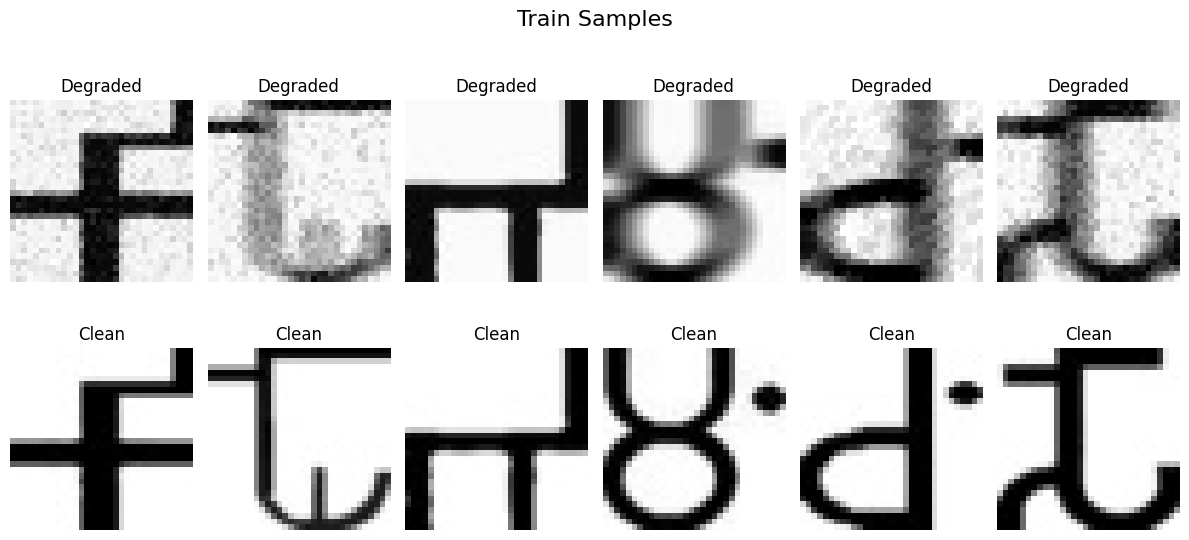


Displaying sample TEST images...


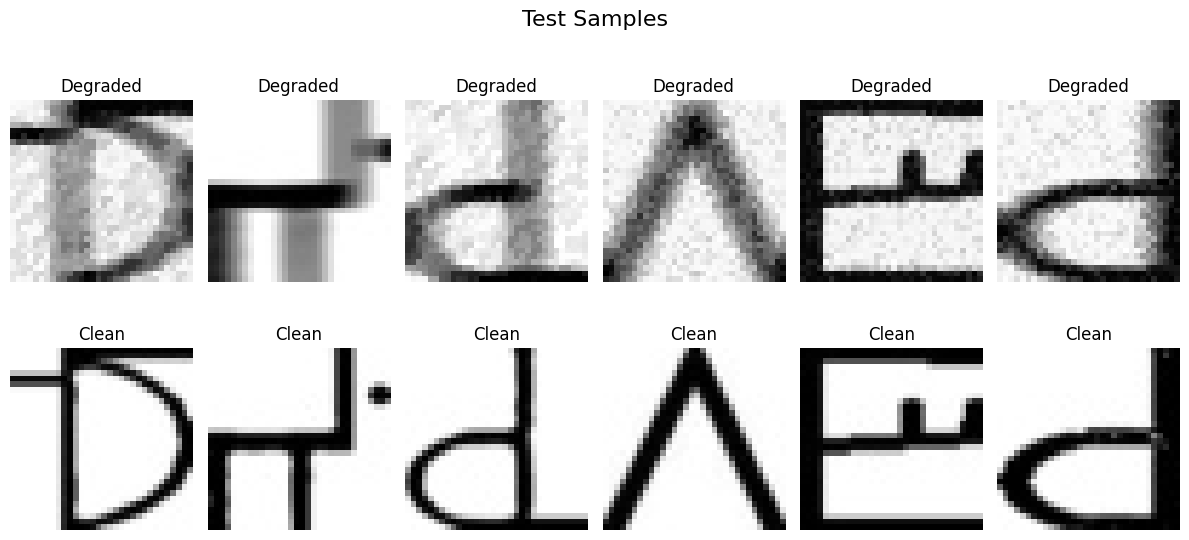

In [ ]:
import matplotlib.pyplot as plt
OUT_ROOT = "/content/drive/MyDrive/qdrm_dataset"

def show_samples(csv_path, title, num_samples=6):
    """
    Display degraded and clean samples side-by-side.
    Reads from train_pairs.csv or test_pairs.csv.
    """
    df = pd.read_csv(csv_path)
    df = df.sample(min(num_samples, len(df)))  # random sampling

    plt.figure(figsize=(12, 6))
    plt.suptitle(title, fontsize=16)

    for i, row in enumerate(df.itertuples(), 1):
        deg = cv2.imread(row.degraded_path, cv2.IMREAD_GRAYSCALE)
        clean = cv2.imread(row.clean_path, cv2.IMREAD_GRAYSCALE)

        # Degraded image
        plt.subplot(2, num_samples, i)
        plt.imshow(deg, cmap="gray")
        plt.axis("off")
        plt.title("Degraded")

        # Clean image
        plt.subplot(2, num_samples, i + num_samples)
        plt.imshow(clean, cmap="gray")
        plt.axis("off")
        plt.title("Clean")

    plt.tight_layout()
    plt.show()

print("\nDisplaying sample TRAIN images...")
show_samples(os.path.join(OUT_ROOT, "train_pairs.csv"), "Train Samples")

print("\nDisplaying sample TEST images...")
show_samples(os.path.join(OUT_ROOT, "test_pairs.csv"), "Test Samples")


In [ ]:
# ============================================================
# QDRM FAST MODE — GOOGLE DRIVE + CUDA-AWARE
# ============================================================

import os
import time
from typing import Tuple

import cv2
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import pennylane as qml


# ============================================================
# 0) CONFIG
# ============================================================

DATA_ROOT = "/content/drive/MyDrive/qdrm_dataset"

CFG = {
    "device": "cuda" if torch.cuda.is_available() else "cpu",

    "train_csv": os.path.join(DATA_ROOT, "train_pairs.csv"),
    "test_csv":  os.path.join(DATA_ROOT, "test_pairs.csv"),

    # FAST MODE
    "image_size": (16, 16),   # H,W

    "patch_size": 4,
    "stride": 4,
    "n_qubits": 16,
    "n_layers": 3,

    "patch_batch": 256,
    "epochs": 3,
    "lr": 3e-4,

    "print_every": 100,

    "batch_size": 1,          # full-image training
    "num_workers": 2,
    "pin_memory": True,

    "save_dir": "/content/drive/MyDrive/qdrm_fast_runs",
}

os.makedirs(CFG["save_dir"], exist_ok=True)

assert CFG["patch_size"] ** 2 == CFG["n_qubits"]

print(f"[CFG] FAST MODE ENABLED → Image size: {CFG['image_size']}")
print(f"[CFG] Device (PyTorch): {CFG['device']}")
print("[NOTE] Quantum execution remains CPU-bound (expected).")


# ============================================================
# 1) IMAGE IO (FAST + CONSISTENT)
# ============================================================

def load_image_01(path: str) -> torch.Tensor:
    """
    Returns: (1,H,W) float32 in [0,1]
    """
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(path)

    img = cv2.resize(
        img,
        (CFG["image_size"][1], CFG["image_size"][0]),
        interpolation=cv2.INTER_AREA
    )

    img = img.astype(np.float32) / 255.0
    return torch.from_numpy(img).unsqueeze(0)  # (1,H,W)


# ============================================================
# 2) PATCHING (GPU-FRIENDLY)
# ============================================================

def extract_patches(img_chw: torch.Tensor) -> torch.Tensor:
    """
    img_chw: (1,H,W) on GPU
    returns: (N,16)
    """
    img_bchw = img_chw.unsqueeze(0)  # (1,1,H,W)
    patches = F.unfold(
        img_bchw,
        kernel_size=CFG["patch_size"],
        stride=CFG["stride"]
    )  # (1,16,N)

    return patches.squeeze(0).T.contiguous()  # (N,16)


def fold_patches(patches: torch.Tensor) -> torch.Tensor:
    """
    patches: (N,16)
    returns: (1,H,W)
    """
    patches = patches.T.unsqueeze(0)  # (1,16,N)

    recon = F.fold(
        patches,
        output_size=CFG["image_size"],
        kernel_size=CFG["patch_size"],
        stride=CFG["stride"]
    )

    return recon.squeeze(0)  # (1,H,W)


# ============================================================
# 3) ENCODING
# ============================================================

def pixels_to_angles(p: torch.Tensor) -> torch.Tensor:
    return torch.arccos(torch.clamp(p, 0.0, 1.0))


def expval_to_pixels(z: torch.Tensor) -> torch.Tensor:
    return torch.clamp((1.0 - z) * 0.5, 0.0, 1.0)


# ============================================================
# 4) QDRM QNODE (CPU-STABLE)
# ============================================================

def make_qnode():
    dev = qml.device("default.qubit", wires=CFG["n_qubits"])

    @qml.qnode(dev, interface="torch", diff_method="parameter-shift")
    def circuit(x, w):
        for i in range(CFG["n_qubits"]):
            qml.RY(x[i], wires=i)

        for l in range(CFG["n_layers"]):
            for i in range(CFG["n_qubits"]):
                qml.RY(w[l, i, 0], wires=i)
                qml.RZ(w[l, i, 1], wires=i)
            for i in range(CFG["n_qubits"] - 1):
                qml.CNOT(wires=[i, i + 1])

        return qml.math.stack(
            [qml.expval(qml.PauliZ(i)) for i in range(CFG["n_qubits"])]
        )

    return circuit


class QDRM(nn.Module):
    def __init__(self):
        super().__init__()
        self.qnode = make_qnode()
        self.weights = nn.Parameter(
            0.01 * torch.randn(CFG["n_layers"], CFG["n_qubits"], 2)
        )

    def forward(self, angles_cpu: torch.Tensor) -> torch.Tensor:
        outs = []
        for i in range(angles_cpu.shape[0]):
            outs.append(self.qnode(angles_cpu[i], self.weights))
        return torch.stack(outs, dim=0)


# ============================================================
# 5) DATASET (DRIVE-SAFE)
# ============================================================

class PairDataset(torch.utils.data.Dataset):
    def __init__(self, csv_path: str):
        df = pd.read_csv(csv_path)
        self.deg = df["degraded_path"].tolist()
        self.cln = df["clean_path"].tolist()

    def __len__(self):
        return len(self.deg)

    def __getitem__(self, idx):
        return (
            load_image_01(self.deg[idx]),
            load_image_01(self.cln[idx]),
        )


# ============================================================
# 6) RESTORE FULL IMAGE
# ============================================================

def restore_full_image(model: QDRM, img: torch.Tensor) -> torch.Tensor:
    patches = extract_patches(img)                 # GPU
    angles = pixels_to_angles(patches)             # GPU

    outs = []
    for s in range(0, angles.shape[0], CFG["patch_batch"]):
        a_cpu = angles[s:s+CFG["patch_batch"]].cpu()
        z_cpu = model(a_cpu)
        outs.append(expval_to_pixels(z_cpu).to(CFG["device"]))

    restored_patches = torch.cat(outs, dim=0)
    return fold_patches(restored_patches)


# ============================================================
# 7) LOSS
# ============================================================

def charbonnier(x, y, eps=1e-3):
    return torch.mean(torch.sqrt((x - y) ** 2 + eps ** 2))


# ============================================================
# 8) TRAIN LOOP
# ============================================================

def train_one_epoch(model, loader, optim, epoch):
    model.train()
    t0 = time.time()

    for i, (deg, cln) in enumerate(loader, 1):
        deg = deg.squeeze(0).to(CFG["device"])
        cln = cln.squeeze(0).to(CFG["device"])

        optim.zero_grad()
        out = restore_full_image(model, deg)
        loss = charbonnier(out, cln)
        loss.backward()
        optim.step()

        if i % CFG["print_every"] == 0:
            print(f"[E{epoch+1}] {i}/{len(loader)} loss={loss.item():.4f}")


# ============================================================
# 9) MAIN
# ============================================================

def main():
    train_ds = PairDataset(CFG["train_csv"])
    train_loader = torch.utils.data.DataLoader(
        train_ds,
        batch_size=CFG["batch_size"],
        shuffle=True,
        num_workers=CFG["num_workers"],
        pin_memory=True,
    )

    model = QDRM()          # stays on CPU (important)
    optim = torch.optim.Adam(model.parameters(), lr=CFG["lr"])

    for e in range(CFG["epochs"]):
        train_one_epoch(model, train_loader, optim, e)

    print("[DONE] FAST MODE training complete.")


if __name__ == "__main__":
    main()


[CFG] FAST MODE ENABLED → Image size: (16, 16)
[CFG] Device (PyTorch): cpu
[NOTE] Quantum execution remains CPU-bound (expected).


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [ ]:
# --------------------------------------------------------------
#  1. Take only 1000 train + 300 test images
# --------------------------------------------------------------
from torch.utils.data import Subset, DataLoader
import random

# ---- reproducible random seed (optional) ----
random.seed(42)

# ---- training subset (1000 images) ----
train_indices = list(range(len(train_dataset_all)))
random.shuffle(train_indices)
train_indices = train_indices[:1000]                     # keep only first 1000
train_subset  = Subset(train_dataset_all, train_indices)

# ---- test subset (300 images) ----
test_indices = list(range(len(test_dataset_all)))
random.shuffle(test_indices)
test_indices = test_indices[:300]                        # keep only first 300
test_subset  = Subset(test_dataset_all, test_indices)

# ---- create the loaders (same batch_size you used before) ----
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_subset,  batch_size=batch_size, shuffle=False)

print(f"Train loader: {len(train_loader.dataset)} images")
print(f"Test  loader: {len(test_loader.dataset)} images")

Train loader: 1000 images
Test  loader: 300 images


In [ ]:
# --------------------------------------------------------------
#  Q-TrOCR 28×28 – FINAL ROBUST FIX (NO UNPACK ERROR)
# --------------------------------------------------------------

import os, random, warnings, torch, torch.nn as nn
import pennylane as qml
from pennylane import numpy as np
from torch.utils.data import Subset, DataLoader
from torchvision import datasets, transforms
from transformers import (
    VisionEncoderDecoderModel,
    Seq2SeqTrainer,
    Seq2SeqTrainingArguments,
)
from tqdm import tqdm

warnings.filterwarnings("ignore")

# ------------------- 0. CONFIG -------------------
IMAGE_SIZE   = 28
SEQ_LEN      = IMAGE_SIZE * IMAGE_SIZE
USE_FULL_SEQ = True
TRUNCATE_TO  = 127 if not USE_FULL_SEQ else SEQ_LEN
BATCH_SIZE   = 4
EPOCHS       = 10
LR           = 5e-5
DEVICE       = torch.device("cuda" if torch.cuda.is_available() else "cpu")
OUTPUT_DIR   = "./q_trocr_brahmi_gpu_final"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ------------------- 1. SUBSET -------------------
random.seed(42)
train_idx = list(range(len(train_dataset_all)))[:100]
test_idx  = list(range(len(test_dataset_all)))[:30]
train_subset = Subset(train_dataset_all, train_idx)
test_subset  = Subset(test_dataset_all,  test_idx)

train_loader = DataLoader(train_subset, batch_size=BATCH_SIZE, shuffle=True,  pin_memory=False)
test_loader  = DataLoader(test_subset,  batch_size=BATCH_SIZE, shuffle=False, pin_memory=False)

print(f"Train: {len(train_subset)} | Test: {len(test_subset)}")

# ------------------- 2. TOKENIZER -------------------
def build_simple_tokenizer(dataset):
    classes = sorted(dataset.classes)
    special = ["<s>", "</s>", "<pad>", "<unk>"]
    vocab = {t:i for i,t in enumerate(special)}
    for i,c in enumerate(classes, start=len(special)): vocab[c] = i
    class SimpleTokenizer:
        def __init__(self): self.vocab = vocab; self.ids2tok = {v:k for k,v in vocab.items()}; self.vocab_size = len(vocab)
        def encode(self, txt): return [self.vocab.get(c, self.vocab["<unk>"]) for c in txt]
        def decode(self, ids, skip_special=True): return "".join(self.ids2tok.get(i,"<unk>") for i in ids if not (skip_special and i<4))
        def __call__(self, texts, **kwargs): return {"input_ids": [self.encode(t) for t in texts]}
    return SimpleTokenizer()

brahmi_tokenizer = build_simple_tokenizer(train_dataset_all)
print(f"Tokenizer: {brahmi_tokenizer.vocab_size} tokens | Using {TRUNCATE_TO} pixels")

# ------------------- 3. QUANTUM ENCODER (ROBUST) -------------------
dev = qml.device("lightning.gpu", wires=3)
EMBED_DIM = 8
pos_encoding = torch.nn.Parameter(torch.randn(TRUNCATE_TO, EMBED_DIM).to(DEVICE))
proj_weights = torch.nn.Parameter(torch.randn(EMBED_DIM, 3).to(DEVICE))

@qml.qnode(dev, interface="torch", diff_method="adjoint")
def quantum_token_encoder(vec):
    qml.AmplitudeEmbedding(vec, wires=range(3), normalize=True)
    qml.Rot(*proj_weights[0], wires=0)
    qml.Rot(*proj_weights[1], wires=1)
    qml.Rot(*proj_weights[2], wires=2)
    return [qml.expval(qml.PauliZ(i)) for i in range(3)]

def quantum_sequence_encoder(pixel_values):
    batch_seq = pixel_values.squeeze(1)  # Remove channel dim
    # Remove any extra leading dims
    while batch_seq.dim() > 2:
        batch_seq = batch_seq.squeeze(0)
    # Ensure 2D: (B, L)
    if batch_seq.dim() == 1:
        batch_seq = batch_seq.unsqueeze(0)
    B, L = batch_seq.shape
    assert L == TRUNCATE_TO, f"Expected {TRUNCATE_TO}, got {L}"

    emb = batch_seq.unsqueeze(-1) * pos_encoding.unsqueeze(0)
    emb = emb / (emb.norm(dim=-1, keepdim=True) + 1e-8)
    emb_flat = emb.reshape(B * L, EMBED_DIM)
    states = torch.stack([quantum_token_encoder(emb_flat[i]) for i in range(B * L)])
    states = states.reshape(B, L, 3)
    return states.mean(dim=1)  # (B, 3)

# ------------------- 4. MODEL -------------------
class QTrOCR28x28(nn.Module):
    def __init__(self):
        super().__init__()
        dec = VisionEncoderDecoderModel.from_pretrained(
            "microsoft/trocr-base-handwritten",
            ignore_mismatched_sizes=True).decoder
        self.decoder = dec.to(DEVICE)
        self.decoder.config.vocab_size = brahmi_tokenizer.vocab_size
        self.proj = nn.Linear(3, 768).to(DEVICE)
        self.decoder.lm_head = nn.Linear(768, brahmi_tokenizer.vocab_size, bias=False).to(DEVICE)

    def forward(self, pixel_values, labels=None):
        pixel_values = pixel_values.to(DEVICE)
        labels = labels.to(DEVICE) if labels is not None else None
        q_out = quantum_sequence_encoder(pixel_values)
        hidden = self.proj(q_out).unsqueeze(1)
        return self.decoder(input_ids=labels, encoder_hidden_states=hidden, labels=labels)

model = QTrOCR28x28()

# ------------------- 5. LOADERWRAPPER -------------------
class LoaderWrapper:
    def __init__(self, loader, tokenizer):
        self.loader = loader
        self.tokenizer = tokenizer
        self.classes = loader.dataset.dataset.classes
        self.data = list(loader)
    def __len__(self): return len(self.data)
    def __getitem__(self, idx):
        imgs, idxs = self.data[idx]
        pv = imgs.unsqueeze(1)  # (B, 1, TRUNCATE_TO)
        texts = [self.classes[i.item()] for i in idxs]
        ids = [self.tokenizer.encode(t) for t in texts]
        ids = [i + [1]*(10-len(i)) for i in ids]
        lbl = torch.tensor(ids, dtype=torch.long)
        return {"pixel_values": pv, "labels": lbl}

train_wrap = LoaderWrapper(train_loader, brahmi_tokenizer)
test_wrap  = LoaderWrapper(test_loader,  brahmi_tokenizer)

# ------------------- 6. TRAINING -------------------
args = Seq2SeqTrainingArguments(
    output_dir=OUTPUT_DIR,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=1,
    num_train_epochs=EPOCHS,
    learning_rate=LR,
    logging_steps=10,
    save_strategy="epoch",
    eval_strategy="epoch",
    predict_with_generate=True,
    fp16=True,
    dataloader_num_workers=0,
    dataloader_pin_memory=False,
    report_to=[],
)

trainer = Seq2SeqTrainer(
    model=model,
    args=args,
    train_dataset=train_wrap,
    eval_dataset=test_wrap,
    tokenizer=brahmi_tokenizer,
)

print("=== TRAINING ON GPU (ROBUST SHAPE HANDLING) ===")
trainer.train()
trainer.save_model(OUTPUT_DIR)
torch.save({"pos":pos_encoding, "proj":proj_weights}, os.path.join(OUTPUT_DIR, "quantum.pth"))
print(f"Model saved to {OUTPUT_DIR}")

/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


Train: 100 | Test: 30
Tokenizer: 174 tokens | Using 784 pixels


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

=== TRAINING ON GPU (ROBUST SHAPE HANDLING) ===
